In [16]:
import sys
sys.path.append('../')

import numpy as np
import pygme

%load_ext autoreload
%autoreload 2

from pygme import GuidedModeExp, Circle, PhotCryst, Lattice
from pygme.guided_modes_new import guided_modes
import matplotlib.pyplot as plt
from itertools import zip_longest

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


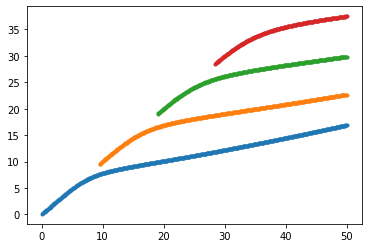

In [145]:
prof = False
if prof:
    import cProfile, pstats, io
    from pstats import SortKey
    pr = cProfile.Profile()
    pr.enable()

# Test guided mode solver
gs=np.linspace(0,50,500)
epses=np.array([1,12,1])
ds=np.array([0.1])
(omegas, coeffs) = guided_modes(gs, epses, ds, step=0.1e-1, tol=1e-6, n_modes=4, mode='TM')
omegasT = [list(filter(None, i)) for i in zip_longest(*omegas)]

if prof: 
    pr.disable()
    s = io.StringIO()
    sortby = SortKey.CUMULATIVE
    ps = pstats.Stats(pr, stream=s).sort_stats(sortby)
    ps.print_stats()
    print(s.getvalue())
else:
    for w in omegasT:
        plt.plot(gs[-len(w):],w,'.')
    plt.show()

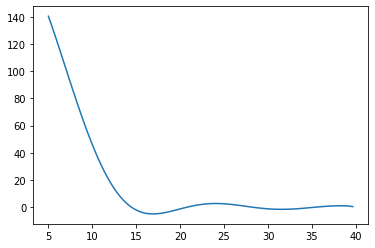

In [53]:
from pygme.guided_modes_new import D22s_TM_vec
oms = np.linspace(5, 40, 100)
D22s = D22s_TM_vec(oms, 40, epses, ds)
plt.plot(oms, np.real(D22s))
plt.show()

In [60]:
d22 = D22s.real
sign_change = np.where(d22[0:-1]*d22[1:] < 0)[0]
print(sign_change)
print(d22[0:-1]*d22[1:])

[26 44 65 86]
[ 1.88322041e+04  1.70519512e+04  1.53192836e+04  1.36509031e+04
  1.20612334e+04  1.05622664e+04  9.16347751e+03  7.87180894e+03
  6.69171858e+03  5.62528785e+03  4.67238245e+03  3.83085741e+03
  3.09679762e+03  2.46478400e+03  1.92817561e+03  1.47939789e+03
  1.11022795e+03  8.12068492e+02  5.76202914e+02  3.94025587e+02
  2.57242391e+02  1.58038234e+02  8.92096027e+01  4.42616451e+01
  1.74705634e+01  3.91327500e+00 -5.32724854e-01  7.84426190e-01
  5.24296435e+00  1.08823597e+01  1.63257910e+01  2.06949200e+01
  2.35213830e+01  2.46590062e+01  2.42002003e+01  2.23993688e+01
  1.96054741e+01  1.62052126e+01  1.25775653e+01  9.05985607e+00
  5.92488511e+00  3.36823393e+00  1.50446496e+00  3.70682304e-01
 -6.42297901e-02  1.13584100e-01  7.78423427e-01  1.78125254e+00
  2.96533897e+00  4.18022939e+00  5.29326236e+00  6.19810589e+00
  6.82008847e+00  7.11834995e+00  7.08506047e+00  6.74213330e+00
  6.13598395e+00  5.33096257e+00  4.40210942e+00  3.42785896e+00
  2.4832535

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


In [108]:
print(min(0, 1, None))

TypeError: '<' not supported between instances of 'NoneType' and 'int'

In [78]:
l = [1, 2, 3]
print(l[-1])

3


In [51]:
print(np.linspace(5, 40, 100))

[ 5.          5.35353535  5.70707071  6.06060606  6.41414141  6.76767677
  7.12121212  7.47474747  7.82828283  8.18181818  8.53535354  8.88888889
  9.24242424  9.5959596   9.94949495 10.3030303  10.65656566 11.01010101
 11.36363636 11.71717172 12.07070707 12.42424242 12.77777778 13.13131313
 13.48484848 13.83838384 14.19191919 14.54545455 14.8989899  15.25252525
 15.60606061 15.95959596 16.31313131 16.66666667 17.02020202 17.37373737
 17.72727273 18.08080808 18.43434343 18.78787879 19.14141414 19.49494949
 19.84848485 20.2020202  20.55555556 20.90909091 21.26262626 21.61616162
 21.96969697 22.32323232 22.67676768 23.03030303 23.38383838 23.73737374
 24.09090909 24.44444444 24.7979798  25.15151515 25.50505051 25.85858586
 26.21212121 26.56565657 26.91919192 27.27272727 27.62626263 27.97979798
 28.33333333 28.68686869 29.04040404 29.39393939 29.74747475 30.1010101
 30.45454545 30.80808081 31.16161616 31.51515152 31.86868687 32.22222222
 32.57575758 32.92929293 33.28282828 33.63636364 33.

## Square lattice 

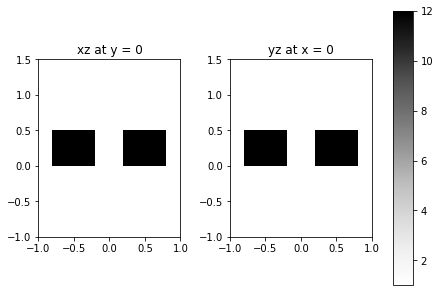

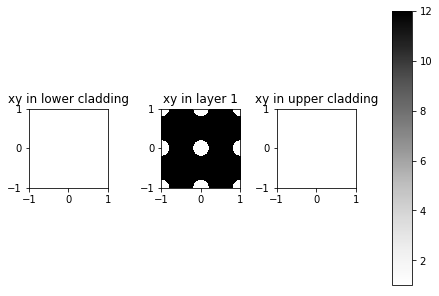

In [3]:
# Initialize a lattice
lattice = Lattice('square')
# Initialize a PhC (by default with eps = 1 in upper and lower cladding, we set upper one to 5)
phc = PhotCryst(lattice)
# Add a layer to the PhC with thickness 1 and background permittivity 10
phc.add_layer(d=0.5, eps_b=12.)
# Add a shape to this layer 
phc.add_shape(Circle(r=0.2))
# phc.claddings[0].add_shape(Circle(r=0.1, eps=5))
# Plot an overview picture
phc.plot_overview(cladding='True')

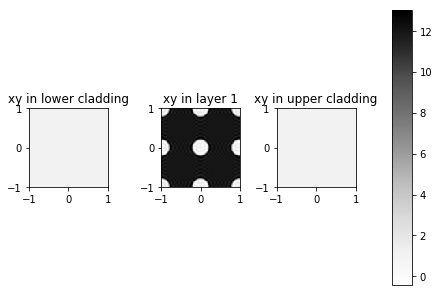

In [4]:
gme = GuidedModeExp(phc, gmax=5)
gme.plot_overview_ft(cladding=True)

In [15]:
gme.run(gmode_inds=[0], N_g_array = 100)

0.2546 seconds for guided mode computation
0.0070 seconds for inverse matrix of Fourier-space permittivity
Running k-point 1 of 1
0.2777 seconds total time to run


In [16]:
print(gme.gvec.shape)
print(gme.freqs)

(2, 121)
[[1.27714216e-08 1.95904722e-03 4.46942536e-03 1.74600982e-02
  1.96915485e-02 2.20133153e-02 2.83018609e-02 2.87778667e-02
  3.53008020e-02 4.41279250e-02 4.91992669e-02 6.38225931e-02
  7.08899752e-02 1.14185832e-01 1.49396195e-01 1.58093584e-01
  1.76351042e-01 1.91965933e-01 1.91994169e-01 2.08503628e-01
  2.34189923e-01 2.42962939e-01 2.57403851e-01 2.57408479e-01
  2.70773040e-01 3.05743926e-01 3.07175663e-01 3.35226698e-01
  3.35244632e-01 3.36478523e-01 3.36478584e-01 3.71349489e-01
  4.25077619e-01 4.25256644e-01 4.66465000e-01 4.66475602e-01
  5.42716608e-01 5.46927393e-01 5.58070115e-01 5.68698337e-01
  6.04732251e-01 6.04735901e-01 6.27476792e-01 6.36469492e-01
  6.84518186e-01 6.84633617e-01 7.31284413e-01 7.40298704e-01
  7.80470624e-01 8.00101360e-01 8.24278322e-01 8.25568699e-01
  8.49235602e-01 8.50313980e-01 9.62670632e-01 1.00298027e+00
  1.01078803e+00 1.01127996e+00 1.01873314e+00 1.03627052e+00
  1.11339747e+00 1.16299620e+00 1.20637698e+00 1.20671191e+00

In [67]:
print(gme.construct_mat(k = [0, 0]).dtype)
# print(np.where(1==gme.gmode_te))

complex128


In [48]:
print(gme.coeffs_te[0][0].shape)
A1list = [gme.coeffs_te[0][i][1, 0] for i in range(5)]
np.array(A1list).shape

(3, 2, 1)


(5, 1)

## Two-layer hexagonal lattice

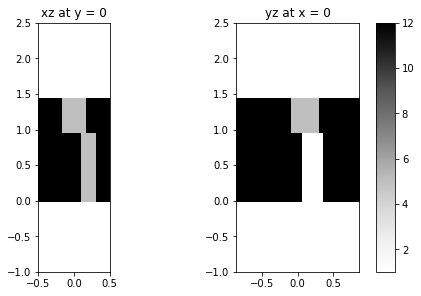

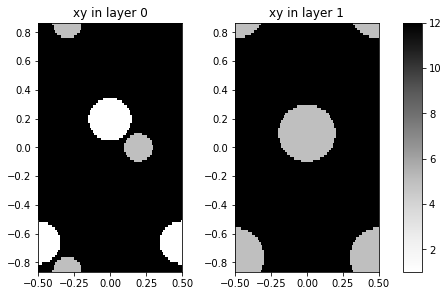

In [90]:
# Initialize a lattice
lattice = Lattice('hexagonal')
# Initialize a PhC (by default with eps = 1 in upper and lower cladding, we set upper one to 5)
phc = PhotCryst(lattice)
# Add a layer to the PhC with thickness 1 and background permittivity 10
phc.add_layer(d=1, eps_b=12)
# Add shapes to this layer 
phc.add_shape(Circle(y_cent = 0.2, r = 0.15), layer=0)
phc.add_shape(Circle(x_cent = 0.2, r = 0.1, eps = 5), layer=0)
# Add another layer and a shape
phc.add_layer(d=0.5, eps_b=12)
phc.layers[-1].add_shape(Circle(y_cent = 0.1, r = 0.2, eps=5))
# Plot an overview picture
phc.plot_overview()

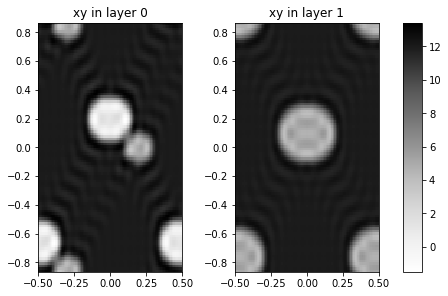

In [91]:
gme = GuidedModeExp(phc, gmax=5)
gme.plot_overview_ft()

In [95]:
gme.run(N_g_array = 5)

[ 1.         10.8482374  10.98427236  1.        ] [1.  0.5]
[[], [], [], [], []] [[], [], [], [], []]


In [71]:
n = [1, 3]
n = np.array(n)
n1 = n[np.remainder(n, 2) == 0]
print(n1.shape)
if n1:
    print('hey')

(0,)


/home/momchil/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  """


In [21]:
t = np.array([1, 2, 3])
o = np.ones((3))
print(np.outer(t, o))
print(t[:, np.newaxis] - o)

[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]
[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]]


In [28]:
t1, t2 = (0, 0)